### Common problems in data form:   
To show you how pandas can re-format data we'll work though a few awkward datasets.  
  

In [ ]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

 #### Column headers are values, not variable names. 

In [282]:
df = pd.read_csv("../Datasets/Greenland_nests.csv")
df

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225


This dataframe has 42 values arranged by three different values:  
    
    Nesting_Site  - one of 7 locations
    Nests_Assessed - a count at each location
    Chick_N_Frequency - frequencies for five possible levels at each location

The *observations* are the chick count frequencies at each nesting site
    
*variables* are:
    Nesting site is a catagorical variable (text string) 
    Chick number is a catagorical variable (becuase of the >3 class)  
    Nests Assessed is a continous variable (integer), which is set for each nesting site.

Use melt to  make this a long form dataframe so that the values can be used correctly.  
If you have time you could try making the chick number variable numeric rather than a string (assuming >3 is equal to 4)

In [284]:
#names = ['0 chicks', '1 chick', '2 chicks', '3 chicks ', '>3 chicks']
#df2 = pd.melt(df, id_vars=['Nesting Site', 'Nests assessed'], value_vars=names, var_name='Chick_N', value_name='Freq')
df2

,Nesting Site,Nests assessed,Chick_N,Freq
0,Qaanaq,356,0 chicks,0.21
1,Sisimiut,523,0 chicks,0.00
2,Maniitsoq,2113,0 chicks,0.00
3,Tasiilaq,67,0 chicks,0.34
4,Ittoqqortoormiit,266,0 chicks,0.44
5,Nuuk,734,0 chicks,0.02
6,Disko Bay,225,0 chicks,0.11
7,Qaanaq,356,1 chick,0.00
8,Sisimiut,523,1 chick,0.34
9,Maniitsoq,2113,1 chick,0.22


Plot the data using sns.stripplot

<AxesSubplot:xlabel='Chick_N', ylabel='Freq'>

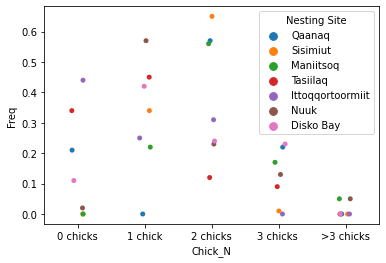

In [286]:
sns.stripplot(x="Chick_N", y="Freq", hue="Nesting Site", data=df2)

Might not be the loveliest graph (we will work more on this in later weeks) but all the data is there.

#### Multiple variables are stored in one column.   
B_conch_loc.csv is a list of specimen locations for *Begonia conchifolia*.  Latitiude and longitude have been listed together in the fourth column

In [177]:
df = pd.read_csv("../Datasets/B_conch_loc.csv")
df

,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. Chiang Cabrera",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
0,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
1,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
2,Begonia conchifolia,Costa Rica,Cartago,"9.588293, -85.296503","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
3,Begonia conchifolia,Costa Rica,Guanacaste,"9.629001, -84.929014","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
4,Begonia conchifolia,Costa Rica,Heredia,"10.113520, -85.166314","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
5,Begonia conchifolia,Costa Rica,San José,"10.228106, -85.012424","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
6,Begonia conchifolia,Panama,Coclé,"9.003572, -79.43242","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
7,Begonia conchifolia,Panama,Panamá,"8.983333, -79.51667","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131


The occurances of the plant are the observations (9 of them).  The variables are the country, location, latitude, longitude and reference.
Reference has been split up into five fields, latitude and longitude have been combined into one.  We should need to combine the reference columns into one and split the lat and long.  We should probably add a header as well.


Specify no header when we read it in (use 'header=None')

In [183]:
#df = pd.read_csv("../Datasets/B_conch_loc.csv", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131


Check the types of data using 'df.dtypes'.  You can use .astype('string') to change the types of columns if needed.

Use string management to combine columns into a new one.   You can use .astype('string') to change the types of columns if needed.  

    df['new'] = df['old1'] + df['old2'].astype('string')

Delete the old columns.  

    df = df.drop(['old1', 'old2'], axis = 1)


Split lat and long using .str.split() on the column.  Use n=1 to limit the number of splits to one, and 'expand=True' to return a dataframe rather than lists

    df[['new1', 'new2']] = df['old'].str.split('delineator', n=1, expand=True)

We can now drop the joint column and re-name the remaining columns

In [187]:
df

,Species,Country,Location,Reference,Latitude,Longitude
0,Begonia conchifolia,Costa Rica,Liberia,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",10.630573,-85.439346
1,Begonia conchifolia,Costa Rica,San José,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",9.934739,-84.087502
2,Begonia conchifolia,Costa Rica,Alajuela,"Burt-Utley, K. 1985 A revision of Central Amer...",10.582930,-84.261923
3,Begonia conchifolia,Costa Rica,Cartago,"Burt-Utley, K. 1985 A revision of Central Amer...",9.588293,-85.296503
4,Begonia conchifolia,Costa Rica,Guanacaste,"Burt-Utley, K. 1985 A revision of Central Amer...",9.629001,-84.929014
5,Begonia conchifolia,Costa Rica,Heredia,"Burt-Utley, K. 1985 A revision of Central Amer...",10.113520,-85.166314
6,Begonia conchifolia,Costa Rica,San José,"Burt-Utley, K. 1985 A revision of Central Amer...",10.228106,-85.012424
7,Begonia conchifolia,Panama,Coclé,"Burt-Utley, K. 1985 A revision of Central Amer...",9.003572,-79.43242
8,Begonia conchifolia,Panama,Panamá,"Burt-Utley, K. 1985 A revision of Central Amer...",8.983333,-79.51667


This is now ready to do some GIS analysis with

#### Variables are stored in both rows and columns.   
leaves.csv has counts of hairs on the abaxial (underside) and adaxial (upperside) of three leaves per plant along with data on expression pattern for three genes per plant and the plant's genotype.  
This is a really horrible format in that we have six counts per plant, three abaxial in one row and three adaxial in annother row.  We also have data which is the same for each plant which is only listed on one row.

In [4]:
df = pd.read_csv("../Datasets/leaves.csv")
df

,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,1,2,Adaxial
1,NaN,NaN,NaN,NaN,NaN,2,1,3,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,2,1,1,Adaxial
3,NaN,NaN,NaN,NaN,NaN,3,2,3,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,1,1,2,Adaxial
5,NaN,NaN,NaN,NaN,NaN,3,2,3,Abaxial
6,MK_560_4,ddm1/+,189.0,37.0,10.0,2,1,1,Adaxial
7,NaN,NaN,NaN,NaN,NaN,1,3,2,Abaxial
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,1,1,1,Adaxial
9,NaN,NaN,NaN,NaN,NaN,3,2,2,Abaxial


Let's deal first with filling in the missing data.  
Check out the df.fillna() infomation on the pandas manual for how to deal with missing data.  We want to use last valid observation to fill in the NaN.

,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,1,2,Adaxial
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,2,1,3,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,2,1,1,Adaxial
3,MK_560_2,ddm1/+,223.0,43.0,14.0,3,2,3,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,1,1,2,Adaxial
5,MK_560_3,wt,432.0,12.0,67.0,3,2,3,Abaxial
6,MK_560_4,ddm1/+,189.0,37.0,10.0,2,1,1,Adaxial
7,MK_560_4,ddm1/+,189.0,37.0,10.0,1,3,2,Abaxial
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,1,1,1,Adaxial
9,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,3,2,2,Abaxial


Now we have all the data there we can deal with the format.

    Each variable must have its own column.  
    Each observation must have its own row.  
    Each value must have its own cell.  
   
Variables: Plant, Genotype, Expression of each gene, Side_of_leaf, Sample_number, Each will have it's own column
Observations: Hair counts 

print out the columns to save typing (df.columns)

In [6]:
df.columns

Index(['Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3', '1', '2', '3', 'Side'], dtype='object')

In [ ]:
id_vars shoud be the variables

In [16]:
ID_Variables = ['Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3','Side']
Value_Variables = ['1', '2', '3']

In [17]:
df2 = pd.melt(df, id_vars=ID_Variables, value_vars=Value_Variables, var_name='Sample', value_name='Count')
df2

,Plant,Genotype,ADH1,SSC2,SSC3,Side,Sample,Count
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Adaxial,1,1
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Abaxial,1,2
2,MK_560_2,ddm1/+,223.0,43.0,14.0,Adaxial,1,2
3,MK_560_2,ddm1/+,223.0,43.0,14.0,Abaxial,1,3
4,MK_560_3,wt,432.0,12.0,67.0,Adaxial,1,1
5,MK_560_3,wt,432.0,12.0,67.0,Abaxial,1,3
6,MK_560_4,ddm1/+,189.0,37.0,10.0,Adaxial,1,2
7,MK_560_4,ddm1/+,189.0,37.0,10.0,Abaxial,1,1
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Adaxial,1,1
9,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Abaxial,1,3


Use sns.catplot to show the differnt betwen hair counts onthe adaxial and abaxial sides of the leaf for the different genotypes.

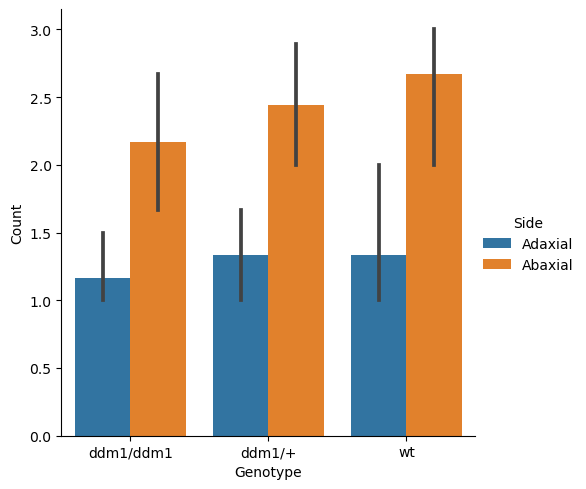

In [27]:
#sns.catplot(x='Genotype', y='Count', hue='Side', data=df2, kind='bar')

This is certainly long form.  We could make it more compact by averaging hair counts across samples.  Use df.groupby() to get the mean hair count when grouped by plant and side.  If you want to retain genotype as well you will have to list that too

In [24]:
#df3 = df2.groupby(['Plant', 'Genotype', 'Side']).mean()

In [25]:
df3

ADH1  SSC2  SSC3     Count
Plant    Genotype  Side                                
MK_560_1 ddm1/ddm1 Abaxial  432.0  12.0  67.0  2.000000
                   Adaxial  432.0  12.0  67.0  1.333333
MK_560_2 ddm1/+    Abaxial  223.0  43.0  14.0  2.666667
                   Adaxial  223.0  43.0  14.0  1.333333
MK_560_3 wt        Abaxial  432.0  12.0  67.0  2.666667
                   Adaxial  432.0  12.0  67.0  1.333333
MK_560_4 ddm1/+    Abaxial  189.0  37.0  10.0  2.000000
                   Adaxial  189.0  37.0  10.0  1.333333
MK_560_5 ddm1/ddm1 Abaxial  543.0   8.0  53.0  2.333333
                   Adaxial  543.0   8.0  53.0  1.000000
MK_560_6 ddm1/+    Abaxial  254.0  28.0  20.0  2.666667
                   Adaxial  254.0  28.0  20.0  1.333333